In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn

# IBM HR Data Analysit Project

## 讀進資料

In [2]:
data = pd.read_csv("C:/Users/USER/Desktop/HR.csv")
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# 檢查有無缺失值

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

### 無缺失值

# 資料觀察 , 資料清理

In [4]:
#先將yes改為1 , NO改為0
# male改為1 ,female改為0
data["Attrition"] = data["Attrition"].replace(["Yes","No"],[1,0])
data["Gender"] = data["Gender"].replace(["Male","Female"],[1,0])

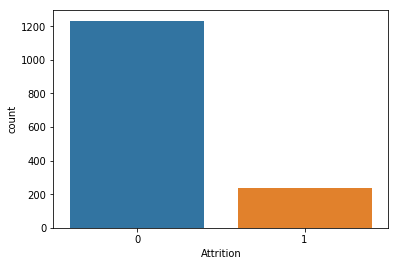

In [5]:
sn.countplot(data["Attrition"])

In [6]:
zero = data["Attrition"].value_counts()[0]
one = data["Attrition"].value_counts()[1]
one/(one+zero)

0.16122448979591836

## 觀察 :
* 資料為不平衡資料集
* 僅有0.161比例的資料是attrition(離職)的

# 找出要轉換的類別變數

In [7]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [8]:
# 找出需要轉換的類別變數
categorical = []
for col, value in data.iteritems():
    if value.dtype == 'object':
        categorical.append(col)
categorical

['BusinessTravel',
 'Department',
 'EducationField',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

# 處理類別變數
* BusinessTravel
* Department  
* EducationField
* Gender
* JobRole 
* MaritalStatus
* Over18
* OverTime

## BusinessTravel

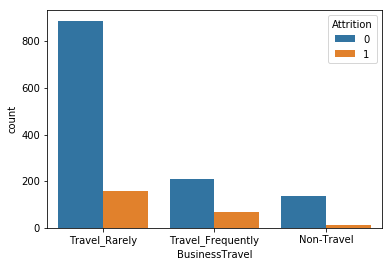

In [9]:
sn.countplot(data["BusinessTravel"],hue= data["Attrition"])

In [10]:
#定義一個函數來做資料觀察
def group_per (data,col1,col2) :
    df = data.groupby(by = [col1,col2]).size().unstack(1)
    df["Sum"] = df[df.columns[0]] + df[df.columns[1]]
    df["Per"] = df[df.columns[1]]/(df[df.columns[0]]+df[df.columns[1]]) 
    df = df.sort_values(by="Per")
    return df

In [11]:
group_per(data,"BusinessTravel","Attrition")

Attrition,0,1,Sum,Per
BusinessTravel,,,,
Non-Travel,138,12,150,0.080000
Travel_Rarely,887,156,1043,0.149569
Travel_Frequently,208,69,277,0.249097


In [12]:
data["business_travel"] = data["BusinessTravel"].replace(["Non-Travel","Travel_Rarely","Travel_Frequently"],[0,1,2])

## 好像越常參加BusinessTravel的員工越容易離職

## 處理Department

In [13]:
data["Department"].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

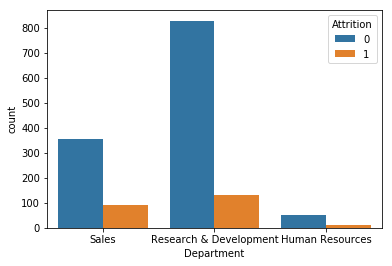

In [14]:
sn.countplot(data["Department"],hue= data["Attrition"])

In [15]:
group_per(data,"Department","Attrition")

Attrition,0,1,Sum,Per
Department,,,,
Research & Development,828,133,961,0.138398
Human Resources,51,12,63,0.190476
Sales,354,92,446,0.206278


In [16]:
# 純類別變數department 轉成dummy variable
department = pd.get_dummies(data["Department"],drop_first=True)

In [17]:
department.head()

,Research & Development,Sales
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0


## 觀察 :
* Sales 和 Hr 離職率稍微高一點
* 我們將 Department轉為 dummy variable

# EducationField

In [18]:
data["EducationField"].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

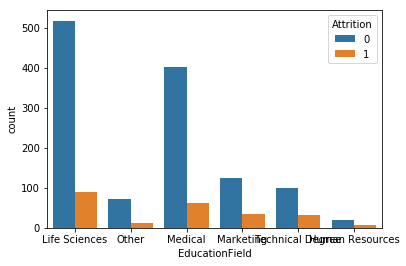

In [19]:
sn.countplot(data["EducationField"],hue=data["Attrition"])

In [20]:
group_per(data,"EducationField","Attrition")

Attrition,0,1,Sum,Per
EducationField,,,,
Other,71,11,82,0.134146
Medical,401,63,464,0.135776
Life Sciences,517,89,606,0.146865
Marketing,124,35,159,0.220126
Technical Degree,100,32,132,0.242424
Human Resources,20,7,27,0.259259


In [21]:
educationfield = pd.get_dummies(data["EducationField"],drop_first=True)

## 觀察 :
* hr , Technical,marketing 都有蠻高的離職率

# JobRole

In [22]:
data["JobRole"].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

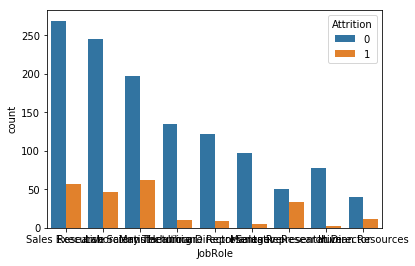

In [23]:
sn.countplot(data["JobRole"],hue=data["Attrition"])

In [24]:
group_per(data,"JobRole","Attrition")

Attrition,0,1,Sum,Per
JobRole,,,,
Research Director,78,2,80,0.025000
Manager,97,5,102,0.049020
Healthcare Representative,122,9,131,0.068702
Manufacturing Director,135,10,145,0.068966
Research Scientist,245,47,292,0.160959
Sales Executive,269,57,326,0.174847
Human Resources,40,12,52,0.230769
Laboratory Technician,197,62,259,0.239382
Sales Representative,50,33,83,0.397590


In [25]:
jobrole = pd.get_dummies(data["JobRole"],drop_first=True)

## 觀察 :
* Human Resources
* Laboratory Technician
* Sales Representative
## 離職率較高
 

# MaritalStatus

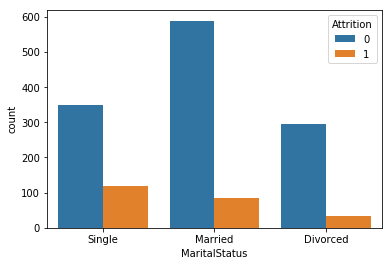

In [26]:
sn.countplot(data["MaritalStatus"],hue = data["Attrition"])

In [27]:
mar = pd.get_dummies(data["MaritalStatus"],drop_first=True)

# Over18

In [28]:
data["Over18"].value_counts()

Y    1470
Name: Over18, dtype: int64

## 這個變數應該是員工是否超過18歲 , 全部都是Y,對於預測上沒有幫助將它去除

In [29]:
data = data.drop(["Over18"],axis=1)

In [30]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'business_travel'],
      dtype='object')

# OverTime

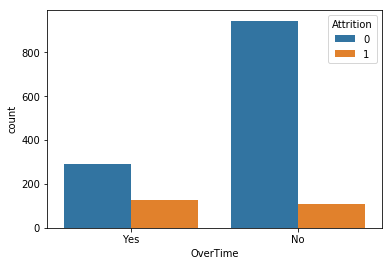

In [31]:
sn.countplot(data["OverTime"],hue=data["Attrition"])

In [32]:
group_per(data,"OverTime","Attrition")

Attrition,0,1,Sum,Per
OverTime,,,,
No,944,110,1054,0.104364
Yes,289,127,416,0.305288


In [33]:
# 將 yes換成1 , no換成0
data["OverTime"] = data["OverTime"].replace(["Yes","No"],[1,0])

## 觀察 :
* 超時加班看起來會顯著增加離職的意願

# 使用random forest 來建立模型
## 使用GridSearchCV 自動找尋參數

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

x = data[['Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
        'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']]

x_clean1 = pd.concat([x.drop(['BusinessTravel','Department','EducationField','JobRole','MaritalStatus'],axis=1)
                     ,department,educationfield,jobrole,mar],axis=1)
y = data["Attrition"]



In [35]:
x_train , x_test , y_train , y_test = train_test_split(x_clean1,y)
param_grid = { 
    'n_estimators': range(100,500,100),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : range(1,10,1),
    'criterion' :['gini', 'entropy']}


In [36]:
rf = RandomForestClassifier()
cv_rfc = GridSearchCV(estimator=rf , param_grid= param_grid,cv=3)
cv_rfc.fit(x_train,y_train)
pre = cv_rfc.predict(x_test)

## 定義一個為模型打分數的矩陣其中
*  accuracy 代表模型綜合準確度
*  precision 代表模型預測1,且預測正確的機率
*  recall 代表測試集中1被正確預測出來的機率
*  f1 基於precision以及recall給分的指標
## 在這個case中 我們其實真正關心的是precision以及recall

In [37]:
from sklearn.metrics import accuracy_score , f1_score
def score_matrix ( true , pred) :
    TP = np.sum(np.logical_and(pred==1,true==1))
    TN = np.sum(np.logical_and(pred==0,true==0))
    FP = np.sum(np.logical_and(pred==1,true==0))
    FN = np.sum(np.logical_and(pred==0,true==1))
    #判斷為真且為真的機率
    Precision = TP/(TP+FP)
    #為真被判斷為真的機率
    Recall = TP/(TP+FN)
    #為假被判斷為真的機率
    FPR = FP/(TN+FP)
    #平測不平衡資料的指標
    F1 = f1_score(y_true = true,y_pred=pred)
    ACC = accuracy_score (y_true=true,y_pred=pred)
    
    score = pd.DataFrame({"Index":["Precision","Recall","FPR","Accuracy","F1"],
                          "Score":[Precision,Recall,FPR,ACC, F1]})
    return score
score_matrix(y_test,pre)

,Index,Score
0,Precision,0.777778
1,Recall,0.125000
2,FPR,0.006410
3,Accuracy,0.861413
4,F1,0.215385


## 很明顯掉入不平衡資料的陷阱裡面
## 準確度0.86看起來不錯, 但是recall(test集中離職的樣本被預測出來的比例)只有0.14 

In [83]:
selector = LassoCV()
sfm = SelectFromModel(selector)
sfm.fit(x_train, y_train)
n_features = sfm.transform(x_train)

# 對付不平衡資料有許多方法 , 這次想測試的是從資料下手的upsampling , 使用的是smote方法

## 使用smote來upsampling
* smote可以將測試集中的少數類(1,離職),利用小眾樣本在特徵空間的相似性來生成新樣本,也就是可以合成一個平衡的測試集來避免模型追求accuracy都猜測大眾label(0)

In [39]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
x_smote, y_smote = sm.fit_sample(x_train, y_train)

In [58]:
# 原本的data
yy = pd.DataFrame(y_train)
yy["Attrition"].value_counts()

0    921
1    181
Name: Attrition, dtype: int64

In [59]:
# smote過後將1的比例提升到跟0相同
yy_smote = pd.DataFrame(y_smote)
yy_smote[0].value_counts()

1    921
0    921
Name: 0, dtype: int64

In [62]:
cv_rfc.fit(x_smote,y_smote)
pre2 = cv_rfc.predict(x_test)

In [63]:
score_matrix(y_test,pre2)

,Index,Score
0,Precision,0.800000
1,Recall,0.214286
2,FPR,0.009615
3,Accuracy,0.872283
4,F1,0.338028


## 做了 upsampling (smote)後各指標都有提升
* Precision 0.77 --> 0.8
* Recall    0.12 --> 0.214
* F1        0215 --> 0.338
* Accu      0.86 --> 0.87



In [86]:
#取得自動選出來的參數
cv_rfc.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': range(100, 500, 100), 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': range(1, 10), 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)>

In [87]:
rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [133]:
# 取得在smote上跑random forest的參數重要性
rf.fit(x_smote,y_smote)
rf.predict(x_test)
feature_important = pd.DataFrame(rf.feature_importances_,index=x_test.columns).sort_values(by=0,ascending = False)
feature_important.index

Index(['OverTime', 'Single', 'EnvironmentSatisfaction', 'DistanceFromHome',
       'MonthlyIncome', 'YearsWithCurrManager', 'StockOptionLevel', 'JobLevel',
       'DailyRate', 'YearsAtCompany', 'MonthlyRate', 'Medical',
       'JobInvolvement', 'JobSatisfaction', 'YearsInCurrentRole', 'Age',
       'Research & Development', 'HourlyRate', 'EmployeeNumber', 'Married',
       'WorkLifeBalance', 'Education', 'Life Sciences', 'NumCompaniesWorked',
       'YearsSinceLastPromotion', 'PercentSalaryHike', 'TotalWorkingYears',
       'RelationshipSatisfaction', 'Laboratory Technician', 'Sales Executive',
       'TrainingTimesLastYear', 'Gender', 'Sales', 'Marketing', 'Manager',
       'Manufacturing Director', 'Research Scientist', 'PerformanceRating',
       'Sales Representative', 'Other', 'Technical Degree', 'Human Resources',
       'Research Director', 'StandardHours', 'EmployeeCount'],
      dtype='object')

# 視覺化 feature 重要性

Text(0.5,0,'Relative Importance')

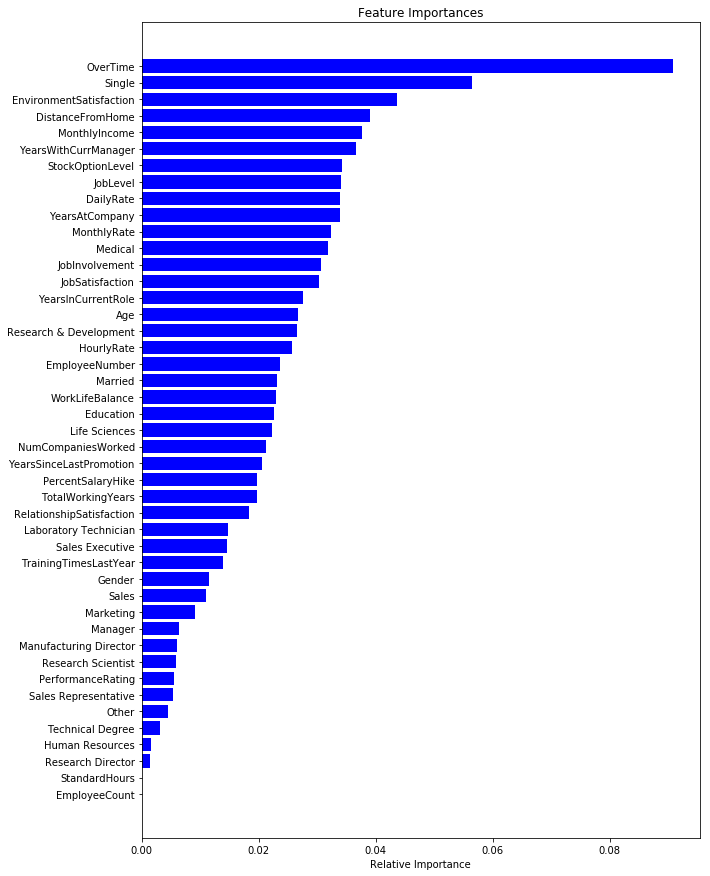

In [172]:

importances =rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,15))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), feature_important.index.values[: : -1])
ax = plt.gca()

plt.xlabel('Relative Importance')

## 似乎超時工作是讓員工想要離職的主要原因 

# 使用RFECV做 feature selection 看能不能進一步提升模型準確度
## RFECV是一種feature selection的方法 , 他會藉由把資料切成幾個alidation ,然後藉由交叉驗證找出適合的feature數量 , 以及選出那些適合的feature

In [95]:
from sklearn.cross_validation import StratifiedKFold
from sklearn.feature_selection import RFECV

D:\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [124]:
rfecv = RFECV(estimator= rf, step=1, cv=StratifiedKFold(y_train, 3),
              scoring='accuracy')
x_rfecv_smote = rfecv.fit_transform(x_smote, y_smote)
x_test_rfecv = rfecv.transform(x_test)

In [125]:
rf.fit(x_rfecv_smote,y_smote)
pre_rfecv = rf.predict(x_test_rfecv)

In [126]:
score_matrix(pred=pre_rfecv,true=y_test)

,Index,Score
0,Precision,0.629630
1,Recall,0.303571
2,FPR,0.032051
3,Accuracy,0.866848
4,F1,0.409639


## 整體來說算是沒有比較好 , recall上升 ,但是precision下降不少
* recall 0.214 --> 0.3
* accu   0.87  --> 0.86
* f1     0.338 --> 0.4
* predision 0.8 --> 0.62

# 結論 :
## 在使用smote將資料 upsampling後 , 得到明顯的效果 , precision上升到80% , 站在公司的角度或許沒辦法將所有惠離職的員工都預測出來 , 但是有80%預測離職的準確度已經可以大概掌握哪些人有可能會離職 , 提早做出準備

## 模型在分類時有些變數影響力特別好
* overtime (超時工作) , 在前面資料觀察時就已經可以看出有overtime的員工離職的比例比沒有overtime的員工高出很多
  後面模型訓練時又把overtime重要性放在第一,可見員工對於overtime的反應很敏感 , 管理者可能要多加注意這方面
  
* single (是否單身) , 我的理解是有家庭或者離過婚(但可能有小孩要養)的人比較不敢輕易離職,畢竟有經濟壓力
* EnvironmentSatisfaction (環境滿意度) , 看來員工也很在意上班的環境
* DistanceFromHome','MonthlyIncome', 'YearsWithCurrManager', 'StockOptionLevel 也都有不錯的影響力

## 最後我們使用randomforest建立了一個預測模型 , 並使用smote(upsampling)來達到更好的預測效果

* precision 達80% 已經可以大概運用模型找出高機率離職的人
* recall 只有大概30~40% 比較可惜的是無法完全找出式那些人會離職
* accu 87%

## 但最後使用RFECV作feature selection效果並不好 , 之後會再找時間做更深的研究

In [ ]:
x_smote